<br/><br/><br/><br/><br/><br/><br/><br/><br/>

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Working with U.S. Census Data in Python Using `censusdis` 

<span style="font-size:24pt">https://github.com/censusdis/censusdis</span>

<span style="font-size:18pt">Darren Vengroff, Ph.D. <br/> vengroff@datapinions.com</span>


May 3, 2023

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Introduction

## What is `censusdis`?

`censusdis` is a Python package for discovering, loading, and analyzing U.S. Census data.

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Background, History, and Upcoming Events

<table>
    <tr>
        <td rowspan="3" width="240">
            <a href="https://www.communitycoalitiononrace.org/" target="_blank">
              <img src="./images/communitycoalitiononrace_logo.png" alt="Community Coalition on Race Logo" width="200"/>
            </a>
        </td>
        <td style="font-size:24pt">2020</td>
        <td style="font-size:16pt">
            CCR migrated from CD-ROM and spreadsheet census data to the US. Census API using 
            the <a href="https://github.com/jtleider/censusdata">censusdata</a> Python package
            and some internal interface code.
        </td>
    </tr>
    <tr>
        <td style="font-size:24pt">2021</td>
        <td style="font-size:16pt">
            Developed <a href="https://github.com/vengroff/divintseg">divintseg</a>, Python
            package for computing diversity, integration, and segregation metrics.
        </td>
    </tr>
    <tr>
        <td style="font-size:24pt">2022</td>
        <td style="font-size:16pt">
            Censusdata support ended. We rewrote CCR's internal interface as the open source <a href="https://github.com/vengroff/censusdis">censusdis</a> package to load data and compute dis metrics. We added mapping and other utilities to make it a one stop shop.
        </td>
    </tr>
    <tr>
        <td>
            <a href="https://www.twosigma.com/" target="_blank">
                <img src="./images/ts-logo.svg" alt="Two Sigma Logo" width="200"/>
            </a>
            <br/>
            <a href="https://www.twosigma.com/data-clinic/" target="_blank">
                <img src="./images/logo-ts-data-clinic.png" alt="TS Data Clinic Logo" width="200"/>
            </a>
            <br/>
            <a href="https://housingnavigatorma.org/" target="_blank">
                <img src="./images/housing-nav-logo.svg" alt="mybinder.org" width="200"/>
            </a>
        </td>
        <td style="font-size:24pt">2022-2023</td>
        <td style="font-size:16pt">
            Used censusdis along with proprietary data to analyze affordable
            housing availability and need in Massachusetts.
        </td>
    </tr>
    <tr>
        <td style="text-align: center;">
            <a href="https://datapinions.com/" target="_blank">
                <img src="https://datapinions.com/wp-content/uploads/2023/02/cropped-favicon512.png" alt="Datapinions" width="100"/>
            </a>
        </td>
        <td style="font-size:24pt">2022-2023</td>
        <td style="font-size:16pt">
            <a href="http://di-map.datapinions.com/">http://di-map.datapinions.com/</a>.
            A nationwide interactive map of diversity and integration built with censusdis.
        </td>
    </tr>
    <tr>
        <td style="text-align: center;">
            <a href="https://pydata.org/seattle2023/" target="_blank">
                <img src="https://pydata.org/seattle2023/wp-content/uploads/2022/10/PyData_logo.png" alt="Datapinions" width="200"/>
            </a>
        </td>
        <td style="font-size:24pt">2023</td>
        <td style="font-size:16pt">
            PyData Seattle tutorial introduces `censusdis` to the world.
        </td>
    </tr>
    <tr>
        <td>
        </td>
        <td style="font-size:24pt">2024</td>
        <td style="font-size:16pt">
            Version 1.0.0 of `censusdis` released.
        </td>
    </tr>
    <tr>
        <td>
            <a href="https://facctconference.org/2024/" target="_blank">
                <img src="./images/facct2024logo.png" alt="ACM FAccT 2024 Logo" width="200"/>
            </a>
        </td>
        <td style="font-size:24pt">June, 2024</td>
        <td style="font-size:16pt">
            Impact charts paper at ACM FAccT 2024.
        </td>
    </tr>
    <tr>
        <td>
            <a href="https://www.scipy2024.scipy.org/" target="_blank">
                <img src="./images/SCIPY-2024.png" alt="SciPy 2024 Logo" width="140"/>
            </a>
        </td>
        <td style="font-size:24pt">July, 2024</td>
        <td style="font-size:16pt">
            Half-day tutorial at SciPy 2024.
        </td>
    </tr>
</table>
    

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## `censusdis` Goals

- ### to be intuitive, Pythonic, and fast;

- ### to have integrated mapping capabilities that save you time and extra coding;

- ### to support all geographies, on and off-spine, not just states, counties, and census tracts;

- ### to support every dataset, every geography, and every year. It's not just about ACS data through the last time the software was updated and released.

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Overview

  - ### "Hello, World"
    - #### `ced.download`
    - #### Data Set, Vintage, Variables
    - #### Geography Basics
  - ### Additional Geographies
    - #### On-Spine Geographies
    - #### Off-Spine Geographies
    - #### The Power of `contained_within` 
  - ### Navigating Metadata
    - #### Data Sets and Vintages
    - #### Groups
    - #### Variables 


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Installing `censusdis`

Standard Python environment idiom.

```shell
pip install censusdis
```

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

In [1]:

# Imports and config.
import pandas as pd
import geopandas as gpd

# Wrap display
pd.set_option('display.max_colwidth', 500)

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# "Hello, World"

We will query
 - the **American Community Survey 5-Year Data** (*data set*)
 - **2022** (*vintage*) 
 - for **median rent** (*variable*)
 - in **Maryland** (*geography*).
 
Using
 - [`censusdis.data.download`](https://censusdis.readthedocs.io/en/latest/data.html#censusdis.data.download),
the workhorse API of censusdis

In [2]:
import censusdis.data as ced
from censusdis.datasets import ACS5
import censusdis.states as states

# The name of the variable that represents 
# median rent in the ACS 5-year data set.
VARIABLE_MEDIAN_RENT = 'B25064_001E'

df_md_median_rent = ced.download(
    
    # Data set: American Community Survey 5-Year
    dataset=ACS5,
    
    # Vintage: 2022
    vintage=2022, 
    
    # Variable: median rent.
    download_variables=VARIABLE_MEDIAN_RENT, 
    
    # Geography: Maryland
    state=states.MD
)

df_md_median_rent

,STATE,B25064_001E
0,24,1598


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Interpreting the Results

We asked for data from a single geography, Maryland, so the return value is a data frame with only one row.

The data frame has two columns:
 - `STATE`, the [FIPS code](https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt) for Maryland. This is also the value of `censusdis.states.MD`.
 - `B25064_001E`, the value of variable we asked for, which is an estimate of median rent<sup>*</sup>.
 
So, according to this data, the median rent in Maryland is $1,598.
 
<sup>*</sup>How did we know that that variable was? More on that to come...

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Extending Hello World: More than One State

We don't have to limit our queries to just a single geography.

We can query several states at once.

In [3]:
df_dmv_median_rent = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=VARIABLE_MEDIAN_RENT, 
    
    # Three "states" this time.
    state=[states.MD, states.VA, states.DC]  
)

df_dmv_median_rent

,STATE,B25064_001E
0,11,1817
1,24,1598
2,51,1440


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Extension: More than One Variable

We can also query several variables at once.

We'll add the variable `NAME` to our query so it is easier for those of us who don't dream in FIPS codes to know what state each row represents.

In [4]:
df_dmv_median_rent = ced.download(
    dataset=ACS5,
    vintage=2022,
    
    # Name and median household income
    download_variables=['NAME', VARIABLE_MEDIAN_RENT],  
    
    state=[states.MD, states.VA, states.DC]  
)

df_dmv_median_rent

,STATE,NAME,B25064_001E
0,11,District of Columbia,1817
1,24,Maryland,1598
2,51,Virginia,1440


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Extension: All the states

We can use `'*'` as a wildcard to get all known geographies of a given
type.

In [5]:
df_all_states_median_rent = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME', VARIABLE_MEDIAN_RENT], 
    
    # Wild card for all the states
    state='*'
)

df_all_states_median_rent

,STATE,NAME,B25064_001E
0,01,Alabama,925
1,02,Alaska,1345
2,04,Arizona,1308
3,05,Arkansas,868
4,06,California,1856
5,08,Colorado,1594
6,09,Connecticut,1374
7,10,Delaware,1286
8,11,District of Columbia,1817
9,12,Florida,1444


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## The results of our queries are ordinary pandas [DataFrames](https://pandas.pydata.org/docs/reference/frame.html)

So we can do whatever analysis we might normally do with a data frame.
For example, what are the ten states with the highest median rent?

In [6]:
df_all_states_median_rent.nlargest(10, VARIABLE_MEDIAN_RENT)

,STATE,NAME,B25064_001E
11,15,Hawaii,1868
4,06,California,1856
8,11,District of Columbia,1817
20,24,Maryland,1598
5,08,Colorado,1594
47,53,Washington,1592
21,25,Massachusetts,1588
30,34,New Jersey,1577
32,36,New York,1507
9,12,Florida,1444


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

Or the ten states with the lowest median rent?

In [7]:
df_all_states_median_rent.nsmallest(10, VARIABLE_MEDIAN_RENT)

,STATE,NAME,B25064_001E
51,72,Puerto Rico,545
48,54,West Virginia,831
3,05,Arkansas,868
41,46,South Dakota,878
24,28,Mississippi,896
17,21,Kentucky,902
34,38,North Dakota,912
15,19,Iowa,914
0,01,Alabama,925
50,56,Wyoming,933


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Query Geometry along with Data

Often, we'd like to plot our data on a map. So we need to know what each state looks like and where it is.
We can add `with_geometry=True` to our query to get what we need.

- The return value is now a `geopandas.GeoDataFrame`
- This is an extension of a `pandas.DataFrame` that adds `geometry` to each row.

In [8]:
gdf_all_states_median_rent = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME', VARIABLE_MEDIAN_RENT], 
    
    state='*',
    
    # We want the geometry of the states too:
    with_geometry=True
)

gdf_all_states_median_rent.head()

,STATE,NAME,B25064_001E,geometry
0,01,Alabama,925,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 30.50886, -88.04565 30.51331, -88.04197 30.51738, -88.03867 30.52041, -88.03510 30.52197, -88.03241 30.52145, -88.02917 30.51965, -88.02622 30.51661, -88.02351 30.49257, -88.02433 30.49077, -88.02675 30.49111, -88.04504 30.50119, -88.05235 30.50559, -88.05338 30.50699)), ((-88.22572 30.32156, -88.22073 30.32211, -88.21958 30.32141, -88.22024 30.32053, -88.22542 30.31989, -88.22620 30.32073, -88.22572 30.32156)), ((-88.26190 30.33508, -88.26038 30..."
1,02,Alaska,1345,"MULTIPOLYGON (((-152.85279 70.89539, -152.84981 70.89773, -152.84851 70.89924, -152.84613 70.89994, -152.84482 70.89979, -152.84328 70.89839, -152.84102 70.89633, -152.83781 70.89434, -152.83389 70.89209, -152.83044 70.89018, -152.82842 70.88866, -152.82510 70.88730, -152.82201 70.88668, -152.81559 70.88609, -152.81072 70.88598, -152.80656 70.88617, -152.80382 70.88660, -152.80287 70.88738, -152.80133 70.88777, -152.80026 70.88703, -152.80061 70.88559, -152.80038 70.88450, -152.80323 70.8836..."
2,04,Arizona,1308,"POLYGON ((-114.81629 32.50804, -114.81432 32.50902, -114.81016 32.50838, -114.80773 32.50873, -114.80524 32.50999, -114.80283 32.51175, -114.80214 32.51481, -114.80405 32.51649, -114.80814 32.51678, -114.81037 32.51839, -114.80972 32.52015, -114.81154 32.52283, -114.81186 32.52314, -114.81329 32.52448, -114.81056 32.52767, -114.80640 32.53119, -114.80218 32.53641, -114.80202 32.53946, -114.80478 32.54166, -114.80597 32.54535, -114.80583 32.54635, -114.80388 32.54800, -114.79564 32.55096, -11..."
3,05,Arkansas,868,"POLYGON ((-94.61792 36.49941, -94.61765 36.49941, -94.55929 36.49950, -94.55465 36.49946, -94.51948 36.49921, -94.48028 36.49931, -94.47636 36.49932, -94.45710 36.49937, -94.45256 36.49938, -94.44736 36.49939, -94.38381 36.49954, -94.37190 36.49957, -94.36120 36.49960, -94.33933 36.49951, -94.32944 36.49947, -94.32743 36.49946, -94.31597 36.49942, -94.31324 36.49941, -94.30706 36.49938, -94.28914 36.49931, -94.28009 36.49927, -94.27611 36.49926, -94.26943 36.49923, -94.25366 36.49917, -94.24..."
4,06,California,1856,"MULTIPOLYGON (((-118.60442 33.47855, -118.59878 33.47794, -118.58594 33.47382, -118.58025 33.47510, -118.57035 33.47531, -118.55760 33.47472, -118.54453 33.47412, -118.53862 33.47702, -118.53428 33.47349, -118.53070 33.46807, -118.52824 33.46660, -118.52477 33.46636, -118.52263 33.46202, -118.51054 33.45531, -118.50285 33.45330, -118.50021 33.44959, -118.49957 33.44593, -118.50029 33.44335, -118.49743 33.44196, -118.49363 33.44256, -118.48935 33.44534, -118.48626 33.44672, -118.48222 33.4483..."


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Plot the Results on a Map

- `cem.plot_us` 
  - Conveniently projects the United States
  - Relocates AK, HI, and PR for a more compact display

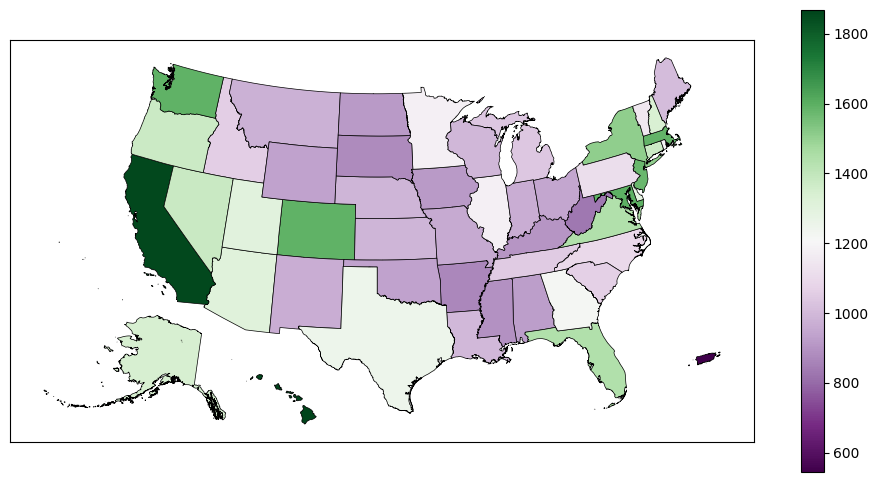

In [9]:
import censusdis.maps as cem

ax = cem.plot_us(
    gdf_all_states_median_rent,
    VARIABLE_MEDIAN_RENT,
    
    # The **kwargs here are standard Matplotlib **kwargs
    cmap="PRGn",
    edgecolor='black',
    linewidth=0.5,
    legend=True,
    figsize=(12, 6)
)

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Additional Geographies

## On-Spine Geography

- Levels of geography that are nested within one another.
- Lower levels are fully contained in higher levels.
- Lower levels completely cover higher levels.
- No two geographies at the same level overlap.
- Levels are:
  - Nation (US)
  - Region
  - Division
  - State
  - County
  - Census Tract
  - Block Group
  - Block

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### The United States

In [10]:
from censusdis.datasets import DECENNIAL_PUBLIC_LAW_94_171

VARIABLE_TOTAL_POPULATION = "P1_001N"

In [11]:
gdf_us = ced.download(
    dataset=DECENNIAL_PUBLIC_LAW_94_171,
    vintage=2020,
    download_variables=['NAME', VARIABLE_TOTAL_POPULATION],
    
    # The entire nation.
    us="*",
    
    with_geometry=True  
)

In [12]:
gdf_us

,US,NAME,P1_001N,geometry
0,1,United States,331449281,"MULTIPOLYGON (((179.48246 51.98283, 179.48656 51.98396, 179.52674 51.98116, 179.54687 51.99141, 179.57105 52.01111, 179.60954 52.02234, 179.63685 52.02571, 179.66333 52.02294, 179.77392 51.97069, 179.77847 51.96222, 179.76725 51.94757, 179.75543 51.93577, 179.74301 51.91175, 179.65588 51.87621, 179.63908 51.87193, 179.61436 51.87177, 179.52187 51.89676, 179.48463 51.92127, 179.47557 51.93746, 179.48246 51.98283)), ((178.62554 51.63730, 178.64551 51.65763, 178.66401 51.66193, 178.67553 51.659..."


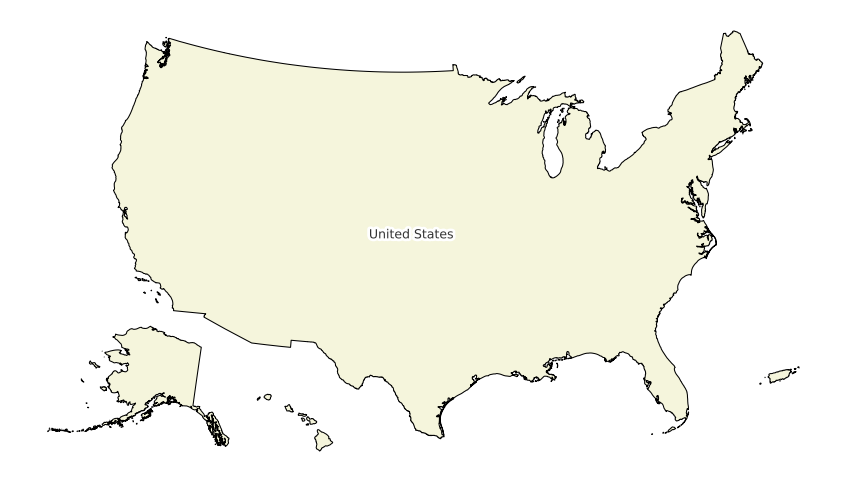

In [13]:
ax = cem.plot_us(
    gdf_us.clip((-180, 0, -65, 80)), # Clip off some outlying territories.
    linewidth=0.75, 
    geo_label=gdf_us["NAME"],
    color='beige', 
    edgecolor='black',
    figsize=(12, 6)
)
_ = ax.axis('off')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### All Regions

In [14]:
gdf_regions = ced.download(
    dataset=DECENNIAL_PUBLIC_LAW_94_171,
    vintage=2020,
    download_variables=['NAME', VARIABLE_TOTAL_POPULATION],
    
    # All the regions (there are only four)
    region="*",
    
    with_geometry=True  
)

In [15]:
gdf_regions

,REGION,NAME,P1_001N,geometry
0,2,Midwest Region,68985454,"MULTIPOLYGON (((-82.73447 41.60351, -82.72425 41.60897, -82.72226 41.61299, -82.72264 41.61679, -82.71802 41.61942, -82.71280 41.62013, -82.70738 41.61949, -82.70467 41.61832, -82.70386 41.61739, -82.70505 41.61523, -82.70205 41.61231, -82.70084 41.61195, -82.69945 41.61153, -82.69697 41.61078, -82.68979 41.61149, -82.68637 41.61366, -82.68532 41.61540, -82.68369 41.61653, -82.67971 41.61928, -82.67855 41.62086, -82.67710 41.62286, -82.67420 41.62386, -82.67358 41.62322, -82.67581 41.61899, ..."
1,3,South Region,126266107,"MULTIPOLYGON (((-75.56752 39.51020, -75.56477 39.51595, -75.56258 39.51911, -75.56132 39.51947, -75.56038 39.51855, -75.56144 39.51552, -75.56545 39.50941, -75.56681 39.50919, -75.56752 39.51020)), ((-75.57080 39.62677, -75.56528 39.62898, -75.56368 39.62962, -75.56319 39.62982, -75.56204 39.62982, -75.56164 39.62982, -75.55945 39.62981, -75.55890 39.62877, -75.55954 39.62493, -75.55871 39.61793, -75.55718 39.61315, -75.55689 39.61044, -75.55617 39.60639, -75.55845 39.60558, -75.56200 39.605..."
2,4,West Region,78588572,"MULTIPOLYGON (((-135.49189 57.09997, -135.48854 57.10006, -135.48684 57.09848, -135.48552 57.09337, -135.48772 57.09202, -135.49100 57.09269, -135.49333 57.09665, -135.49189 57.09997)), ((-135.49358 56.83018, -135.48890 56.83081, -135.48447 56.83066, -135.48347 56.83212, -135.48334 56.83232, -135.47645 56.83310, -135.47244 56.83455, -135.47181 56.83478, -135.46923 56.83679, -135.46677 56.83678, -135.46309 56.83584, -135.46218 56.83398, -135.46541 56.83080, -135.47126 56.82992, -135.47507 56...."
3,1,Northeast Region,57609148,"MULTIPOLYGON (((-70.89841 42.34027, -70.89721 42.34332, -70.89560 42.34389, -70.89460 42.34238, -70.89460 42.34031, -70.89516 42.33888, -70.89671 42.33848, -70.89735 42.33949, -70.89841 42.34027)), ((-70.89844 42.33119, -70.89726 42.33264, -70.89706 42.33395, -70.89603 42.33472, -70.89460 42.33510, -70.89406 42.33498, -70.89397 42.33450, -70.89501 42.33381, -70.89569 42.33194, -70.89608 42.33035, -70.89755 42.33025, -70.89785 42.33068, -70.89859 42.33050, -70.89844 42.33119)), ((-70.90360 41..."


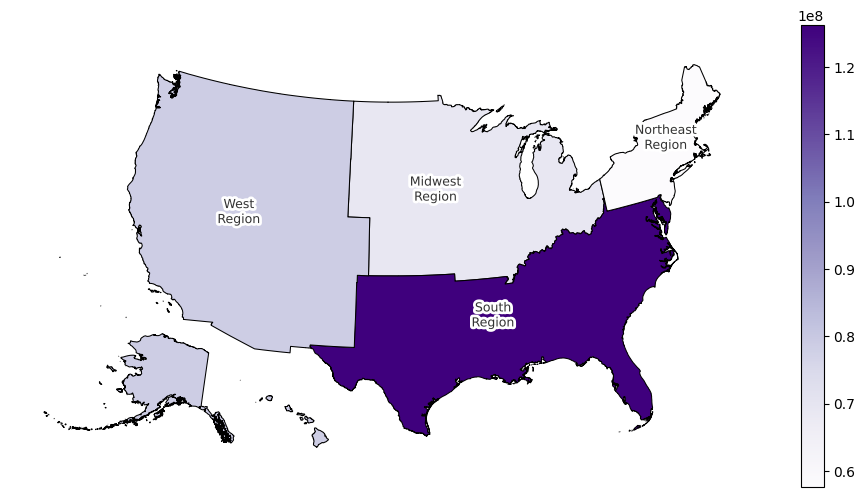

In [16]:
ax = cem.plot_us(
    gdf_regions,
    VARIABLE_TOTAL_POPULATION,
    legend=True,
    linewidth=0.75, 
    geo_label=gdf_regions["NAME"].str.replace(' ', '\n'),
    cmap="Purples", 
    edgecolor='black',
    figsize=(12, 6)
)
_ = ax.axis('off')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### The regions cover the entire US

So the sum of the population of the regions is equal to the population
of the United States.

In [17]:
gdf_regions[VARIABLE_TOTAL_POPULATION].sum()

331449281

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### All Divisions

Divisions are the next level of the hierarchy inside of regions.

In [18]:
gdf_divisions = ced.download(
    dataset=DECENNIAL_PUBLIC_LAW_94_171,
    vintage=2020,
    download_variables=['NAME', VARIABLE_TOTAL_POPULATION],
    
    # All the divisions
    division="*",
    
    with_geometry=True  
)

In [19]:
gdf_divisions

,DIVISION,NAME,P1_001N,geometry
0,1,New England Division,15116205,"MULTIPOLYGON (((-67.76649 44.53099, -67.76292 44.53268, -67.75960 44.53302, -67.75888 44.53132, -67.76221 44.52929, -67.76578 44.52946, -67.76649 44.53099)), ((-67.76601 44.53759, -67.76340 44.53844, -67.76126 44.53742, -67.76387 44.53437, -67.76744 44.53437, -67.76601 44.53759)), ((-67.79216 44.48081, -67.77980 44.47708, -67.78241 44.47505, -67.78408 44.47284, -67.78902 44.47236, -67.79150 44.47668, -67.79596 44.47618, -67.79216 44.48081)), ((-67.80594 44.51726, -67.80404 44.51912, -67.8021..."
1,2,Middle Atlantic Division,42492943,"MULTIPOLYGON (((-72.03769 41.25128, -72.03472 41.25642, -72.03164 41.25784, -72.02944 41.26309, -72.02783 41.26340, -72.02590 41.26122, -72.02294 41.26154, -72.02129 41.26236, -72.02286 41.26436, -72.02112 41.26959, -72.02321 41.27063, -72.02423 41.27307, -72.02305 41.27485, -72.02029 41.27519, -72.02028 41.27519, -72.01073 41.27193, -72.00787 41.27095, -72.00742 41.26975, -72.00947 41.26845, -72.00978 41.26622, -72.01299 41.26432, -72.01004 41.26201, -72.00694 41.26231, -72.00710 41.26399, ..."
2,3,East North Central Division,47368533,"MULTIPOLYGON (((-82.73447 41.60351, -82.72425 41.60897, -82.72226 41.61299, -82.72264 41.61679, -82.71802 41.61942, -82.71280 41.62013, -82.70738 41.61949, -82.70467 41.61832, -82.70386 41.61739, -82.70505 41.61523, -82.70205 41.61231, -82.70084 41.61195, -82.69945 41.61153, -82.69697 41.61078, -82.68979 41.61149, -82.68637 41.61366, -82.68532 41.61540, -82.68369 41.61653, -82.67971 41.61928, -82.67855 41.62086, -82.67710 41.62286, -82.67420 41.62386, -82.67358 41.62322, -82.67581 41.61899, ..."
3,4,West North Central Division,21616921,"MULTIPOLYGON (((-89.59206 47.96668, -89.59147 47.96718, -89.58815 47.96998, -89.58662 47.97140, -89.58639 47.97149, -89.58365 47.97249, -89.58237 47.97470, -89.58101 47.97630, -89.58033 47.97778, -89.58203 47.97846, -89.58254 47.97897, -89.58033 47.97925, -89.57940 47.97967, -89.57906 47.97982, -89.57490 47.98068, -89.57260 47.98056, -89.57311 47.97897, -89.56979 47.97865, -89.56954 47.97863, -89.56940 47.97863, -89.56733 47.97863, -89.56249 47.97914, -89.56205 47.97917, -89.55926 47.97937, ..."
4,5,South Atlantic Division,66089734,"MULTIPOLYGON (((-75.56752 39.51020, -75.56477 39.51595, -75.56258 39.51911, -75.56132 39.51947, -75.56038 39.51855, -75.56144 39.51552, -75.56545 39.50941, -75.56681 39.50919, -75.56752 39.51020)), ((-75.57080 39.62677, -75.56528 39.62898, -75.56368 39.62962, -75.56319 39.62982, -75.56204 39.62982, -75.56164 39.62982, -75.55945 39.62981, -75.55890 39.62877, -75.55954 39.62493, -75.55871 39.61793, -75.55718 39.61315, -75.55689 39.61044, -75.55617 39.60639, -75.55845 39.60558, -75.56200 39.605..."
5,6,East South Central Division,19402234,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 30.50886, -88.04565 30.51331, -88.04197 30.51738, -88.03867 30.52041, -88.03510 30.52197, -88.03241 30.52145, -88.02917 30.51965, -88.02622 30.51661, -88.02351 30.49257, -88.02433 30.49077, -88.02675 30.49111, -88.04504 30.50119, -88.05235 30.50559, -88.05338 30.50699)), ((-88.22572 30.32156, -88.22073 30.32211, -88.21958 30.32141, -88.22024 30.32053, -88.22542 30.31989, -88.22620 30.32073, -88.22572 30.32156)), ((-88.26190 30.33508, -88.26038 30..."
6,7,West South Central Division,40774139,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 29.86262, -88.86431 29.86100, -88.86348 29.85883, -88.86271 29.85678, -88.86208 29.85279, -88.86144 29.85035, -88.86144 29.84797, -88.86233 29.84620, -88.86406 29.84658, -88.86514 29.84847, -88.86457 29.85102, -88.86566 29.85584, -88.86770 29.85950, -88.86770 29.86155)), ((-88.87933 29.87402, -88.87831 29.87702, -88.87665 29.87979, -88.87531 29.88195, -88.87486 29.88062, -88.87543 29.87785, -88.87607 29.87502, -88.87882 29.87236, -88.87933 29.874..."
7,8,Mountain Division,24919150,"POLYGON ((-120.00645 39.27288, -120.00643 39.27889, -120.00643 39.28083, -120.00642 39.28334, -120.00632 39.31650, -120.00627 39.33068, -120.00624 39

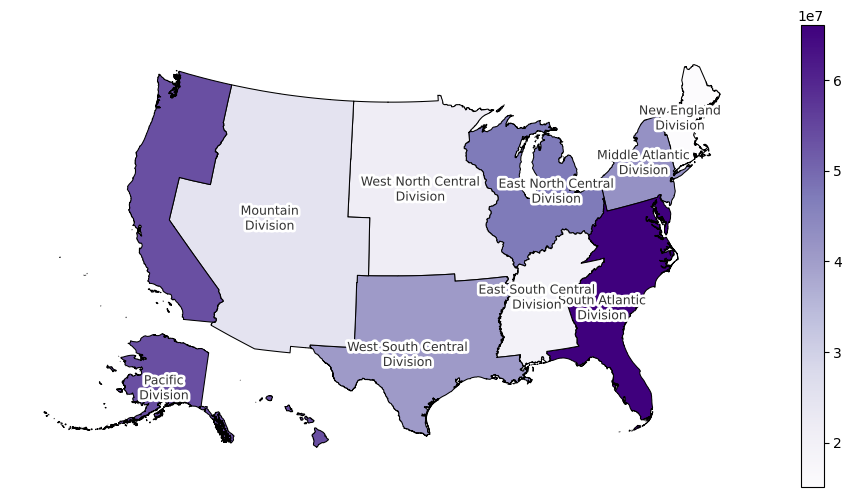

In [20]:
ax = cem.plot_us(
    gdf_divisions,
    VARIABLE_TOTAL_POPULATION,
    legend=True,
    linewidth=0.75, 
    geo_label=gdf_divisions["NAME"].str.replace(' Division', '\nDivision'),
    cmap="Purples", 
    edgecolor='black',
    figsize=(12, 6)
)
_ = ax.axis('off')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### The divisions cover all the regions, which in turn cover the entire US

- the sum of the population of the regions is equal to the population
of the United States.

- we can add them up at any level and get the same answer.

- this is a fundademntal property of on-spine geographies.

In [21]:
gdf_regions[VARIABLE_TOTAL_POPULATION].sum()

331449281

In [22]:
gdf_divisions[VARIABLE_TOTAL_POPULATION].sum()

331449281

In [23]:
gdf_us[VARIABLE_TOTAL_POPULATION].sum()

331449281

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### The divisions in a region add up to the population of the division

In [24]:
gdf_divisions[gdf_divisions['DIVISION'].isin(("1", "2"))][VARIABLE_TOTAL_POPULATION].sum()

57609148

In [25]:
gdf_regions[gdf_regions['REGION'] == "1"][VARIABLE_TOTAL_POPULATION].sum()

57609148

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### States (and DC) nest inside divisions

This takes us back to the state geometries we had in the median rent query.

In [26]:
gdf_states = ced.download(
    dataset=DECENNIAL_PUBLIC_LAW_94_171,
    vintage=2020,
    download_variables=['NAME', VARIABLE_TOTAL_POPULATION],

    # All the states
    state="*",
    
    with_geometry=True  
)

In [27]:
gdf_states.head()

,STATE,NAME,P1_001N,geometry
0,42,Pennsylvania,13002700,"POLYGON ((-80.51989 40.90666, -80.51963 40.91142, -80.51909 40.92106, -80.51909 40.92160, -80.51905 40.95336, -80.51905 40.95336, -80.51904 40.95873, -80.51900 40.98738, -80.51899 40.99411, -80.51899 40.99544, -80.51894 41.01073, -80.51893 41.01423, -80.51893 41.01539, -80.51893 41.02403, -80.51894 41.02956, -80.51894 41.03278, -80.51894 41.03280, -80.51895 41.05204, -80.51896 41.06155, -80.51895 41.06303, -80.51893 41.07095, -80.51896 41.07175, -80.51896 41.07187, -80.51900 41.07501, -80.51..."
1,06,California,39538223,"MULTIPOLYGON (((-118.60442 33.47855, -118.59878 33.47794, -118.58594 33.47382, -118.58025 33.47510, -118.57035 33.47531, -118.55760 33.47472, -118.54453 33.47412, -118.53862 33.47702, -118.53428 33.47349, -118.53070 33.46807, -118.52824 33.46660, -118.52477 33.46636, -118.52263 33.46202, -118.51054 33.45531, -118.50285 33.45330, -118.50021 33.44959, -118.49957 33.44593, -118.50029 33.44335, -118.49743 33.44196, -118.49363 33.44256, -118.48935 33.44534, -118.48626 33.44672, -118.48222 33.4483..."
2,54,West Virginia,1793716,"POLYGON ((-82.64320 38.16909, -82.64300 38.16956, -82.63905 38.17111, -82.62546 38.17049, -82.61943 38.16903, -82.61602 38.16972, -82.61349 38.17024, -82.61241 38.17090, -82.61134 38.17155, -82.60959 38.17553, -82.60425 38.18764, -82.60153 38.19294, -82.59933 38.19723, -82.59886 38.20101, -82.59844 38.21739, -82.60035 38.21895, -82.60433 38.22057, -82.60575 38.22114, -82.60894 38.22366, -82.61037 38.22677, -82.61252 38.23455, -82.61226 38.23609, -82.60713 38.24598, -82.60533 38.24730, -82.60..."
3,49,Utah,3271616,"POLYGON ((-114.05296 37.59278, -114.05247 37.60478, -114.05231 37.63632, -114.05184 37.72404, -114.05173 37.74600, -114.05178 37.74625, -114.05167 37.74696, -114.05111 37.75628, -114.04992 37.76559, -114.04847 37.80986, -114.04968 37.82364, -114.04993 37.85251, -114.04966 37.88137, -114.05005 37.94180, -114.05042 37.99996, -114.05038 38.01284, -114.04990 38.14860, -114.04990 38.14876, -114.05014 38.24996, -114.04942 38.26470, -114.04993 38.36633, -114.04994 38.36873, -114.05012 38.40454, -11..."
4,36,New York,20201249,"MULTIPOLYGON (((-79.76215 42.24305, -79.76196 42.25135, -79.76195 42.26933, -79.76195 42.26986, -79.74351 42.27526, -79.73892 42.27660, -79.73711 42.27730, -79.71783 42.28471, -79.71406 42.28620, -79.71076 42.28750, -79.68776 42.29658, -79.68320 42.29838, -79.68305 42.29844, -79.67796 42.30076, -79.66241 42.30785, -79.64536 42.31563, -79.64468 42.31598, -79.63853 42.31909, -79.63198 42.32241, -79.61247 42.33229, -79.61128 42.33347, -79.60757 42.33718, -79.60704 42.33771, -79.60589 42.33885, ..."


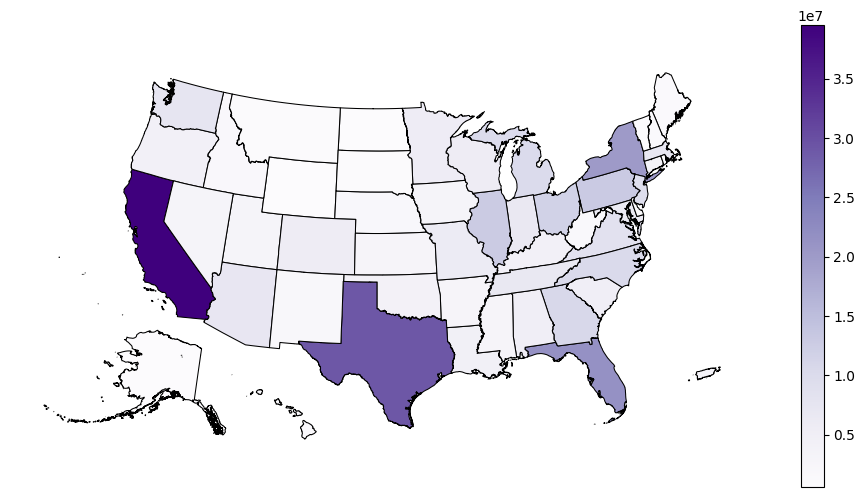

In [28]:
ax = cem.plot_us(
    gdf_states,
    VARIABLE_TOTAL_POPULATION,
    legend=True,
    linewidth=0.75, 
    cmap="Purples", 
    edgecolor='black',
    figsize=(12, 6)
)
_ = ax.axis('off')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Within a State

For the next series of examples, we will go back to the ACS5 dataset and we
will query and plot median household income at several different levels of
geography.

In [29]:
VARIABLE_MEDIAN_HOUSEHOLD_INCOME = 'B19013_001E'

gdf_md = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME', VARIABLE_MEDIAN_HOUSEHOLD_INCOME],

    # Just Maryland
    state=states.MD,
    
    with_geometry=True  
)

In [30]:
gdf_md

,STATE,NAME,B19013_001E,geometry
0,24,Maryland,98461,"MULTIPOLYGON (((-76.04998 37.99011, -76.04865 37.99142, -76.04768 37.99340, -76.04774 37.99488, -76.04856 37.99692, -76.04842 37.99995, -76.04824 38.00397, -76.04707 38.00584, -76.04517 38.00874, -76.04648 38.01061, -76.04775 38.01238, -76.04732 38.01949, -76.04493 38.02550, -76.04100 38.03196, -76.03772 38.03238, -76.03531 38.03143, -76.03094 38.03333, -76.02874 38.03548, -76.02411 38.03669, -76.02150 38.03845, -76.01313 38.03976, -76.00927 38.03843, -76.00734 38.03671, -76.00726 38.03261, ..."


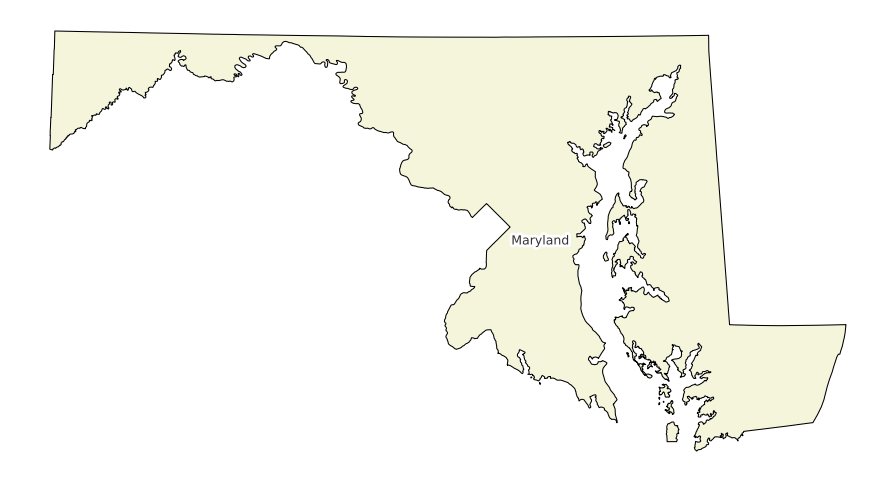

In [31]:
ax = cem.plot_map(
    gdf_md,
    linewidth=0.75, 
    geo_label=gdf_md["NAME"].str.replace(' ', '\n'),
    color='beige', 
    edgecolor='black',
    figsize=(12, 6)
)
_ = ax.axis('off')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Counties

In [32]:
gdf_md_counties = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME', VARIABLE_MEDIAN_HOUSEHOLD_INCOME],

    # All Counties in Maryland. Notice how we use
    # two different arguments.
    state=states.MD,
    county='*',
    
    with_geometry=True  
)

In [33]:
gdf_md_counties.head()

,STATE,COUNTY,NAME,B19013_001E,geometry
0,24,001,"Allegany County, Maryland",55248,"POLYGON ((-79.06756 39.47944, -79.06003 39.49258, -79.05310 39.50475, -79.04169 39.52470, -79.01802 39.56609, -78.99867 39.59994, -78.98915 39.61658, -78.96721 39.65493, -78.96104 39.66573, -78.95500 39.67630, -78.94681 39.69063, -78.92842 39.72278, -78.91485 39.72280, -78.90314 39.72281, -78.88574 39.72283, -78.85387 39.72287, -78.84993 39.72288, -78.84534 39.72289, -78.83765 39.72290, -78.81537 39.72292, -78.80837 39.72293, -78.78953 39.72296, -78.77254 39.72298, -78.76114 39.72299, -78.74..."
1,24,003,"Anne Arundel County, Maryland",116009,"POLYGON ((-76.83849 39.10421, -76.83047 39.10662, -76.82871 39.10758, -76.82667 39.10995, -76.82572 39.11555, -76.82461 39.11722, -76.82272 39.11867, -76.81615 39.12143, -76.81203 39.12273, -76.80705 39.12293, -76.80118 39.12219, -76.79740 39.12258, -76.79500 39.12325, -76.79050 39.12550, -76.78646 39.12951, -76.78518 39.13208, -76.78420 39.13960, -76.78262 39.14381, -76.78151 39.14550, -76.77962 39.14773, -76.77696 39.15088, -76.76710 39.16238, -76.76374 39.16623, -76.76042 39.16891, -76.75..."
2,24,005,"Baltimore County, Maryland",88157,"MULTIPOLYGON (((-76.32570 39.31397, -76.32452 39.31380, -76.32296 39.31337, -76.32143 39.31285, -76.32167 39.31258, -76.32292 39.31267, -76.32365 39.31269, -76.32407 39.31263, -76.32480 39.31284, -76.32512 39.31317, -76.32576 39.31349, -76.32570 39.31397)), ((-76.38693 39.24921, -76.38089 39.24956, -76.37875 39.25224, -76.37293 39.25342, -76.37011 39.25543, -76.35661 39.26086, -76.35336 39.26100, -76.34383 39.25726, -76.34797 39.25011, -76.34999 39.24882, -76.37148 39.23795, -76.37543 39.237..."
3,24,009,"Calvert County, Maryland",128078,"POLYGON ((-76.70121 38.71276, -76.69915 38.71568, -76.69359 38.72476, -76.69370 38.72707, -76.69555 38.73154, -76.69571 38.73318, -76.69500 38.73508, -76.69384 38.73591, -76.68701 38.73590, -76.68463 38.73716, -76.68402 38.73835, -76.68484 38.74376, -76.68487 38.74693, -76.68636 38.74847, -76.68426 38.75161, -76.68555 38.75304, -76.68526 38.75582, -76.68267 38.75593, -76.68122 38.75763, -76.67898 38.75551, -76.67327 38.75540, -76.67146 38.75674, -76.66961 38.75670, -76.66980 38.75836, -76.66..."
4,24,011,"Caroline County, Maryland",65326,"POLYGON ((-76.01505 38.72869, -76.01321 38.73329, -76.00900 38.73647, -76.00521 38.73639, -75.99967 38.73484, -75.99638 38.73571, -75.99538 38.73668, -75.99435 38.73976, -75.99459 38.74189, -75.99934 38.75207, -75.99945 38.75444, -75.99895 38.75560, -75.99712 38.75723, -75.99376 38.75928, -75.97997 38.76371, -75.97641 38.76551, -75.97180 38.76954, -75.96861 38.77284, -75.96775 38.77440, -75.96824 38.77773, -75.96709 38.77934, -75.96404 38.77967, -75.95455 38.77750, -75.95148 38.77786, -75.94..."


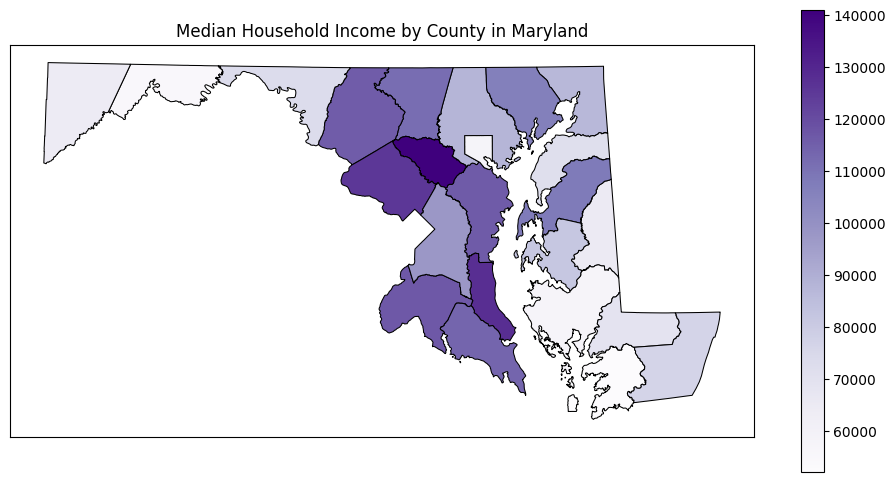

In [34]:
ax = cem.plot_map(
    gdf_md_counties,
    VARIABLE_MEDIAN_HOUSEHOLD_INCOME,
    legend=True,
    linewidth=0.75, 
    cmap="Purples", 
    edgecolor='black',
    figsize=(12, 6)
)

_ = ax.set_title("Median Household Income by County in Maryland")

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Census Tracts in Maryland

In [35]:
gdf_md_tracts = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME', VARIABLE_MEDIAN_HOUSEHOLD_INCOME],

    # All tracts in all counties in Maryland. 
    # We now use three arguments.
    state=states.MD,
    county='*',
    tract='*',
    
    with_geometry=True  
)

In [36]:
gdf_md_tracts.head()

,STATE,COUNTY,TRACT,NAME,B19013_001E,geometry
0,24,001,000100,Census Tract 1; Allegany County; Maryland,56232.0,"POLYGON ((-78.66654 39.64906, -78.66520 39.65148, -78.66319 39.65336, -78.66216 39.65597, -78.66007 39.65869, -78.66084 39.66155, -78.66048 39.66255, -78.65802 39.66419, -78.65663 39.66696, -78.65684 39.66899, -78.65355 39.67196, -78.65046 39.67130, -78.64767 39.67011, -78.64530 39.67001, -78.64251 39.67148, -78.63958 39.67210, -78.63766 39.67674, -78.63756 39.67990, -78.63623 39.68561, -78.63577 39.68645, -78.63868 39.68795, -78.64460 39.68841, -78.64520 39.68896, -78.64384 39.69198, -78.64..."
1,24,001,000200,Census Tract 2; Allegany County; Maryland,66596.0,"POLYGON ((-78.77810 39.60210, -78.77686 39.60403, -78.76811 39.60870, -78.76050 39.60998, -78.75151 39.60995, -78.74935 39.60857, -78.74922 39.60654, -78.74706 39.60569, -78.74228 39.60939, -78.73905 39.60970, -78.73376 39.61393, -78.73355 39.61553, -78.73619 39.62171, -78.74010 39.62368, -78.73970 39.62475, -78.73916 39.62556, -78.73840 39.62725, -78.73628 39.62543, -78.73550 39.62611, -78.73528 39.62630, -78.73138 39.62583, -78.72875 39.62634, -78.72470 39.62936, -78.72339 39.63281, -78.72..."
2,24,001,000500,Census Tract 5; Allegany County; Maryland,47781.0,"POLYGON ((-78.75836 39.65248, -78.75665 39.65446, -78.75252 39.65737, -78.75163 39.65745, -78.75008 39.65754, -78.74813 39.65693, -78.74125 39.66346, -78.74022 39.66439, -78.73594 39.66725, -78.73215 39.67188, -78.73070 39.67286, -78.72908 39.67325, -78.72548 39.67338, -78.71726 39.67374, -78.71441 39.67297, -78.71315 39.67323, -78.70862 39.67625, -78.70791 39.67532, -78.70584 39.67504, -78.70436 39.67363, -78.70578 39.66998, -78.70662 39.66578, -78.70738 39.66450, -78.70757 39.66211, -78.70..."
3,24,001,000600,Census Tract 6; Allegany County; Maryland,48607.0,"POLYGON ((-78.76192 39.64337, -78.75821 39.64820, -78.75510 39.64781, -78.75281 39.64462, -78.75229 39.64485, -78.74695 39.64599, -78.74375 39.64660, -78.74103 39.64631, -78.73625 39.64540, -78.73488 39.64397, -78.73365 39.64137, -78.73294 39.63684, -78.72741 39.63560, -78.72316 39.63646, -78.72015 39.63772, -78.71852 39.63764, -78.71741 39.63624, -78.71767 39.63492, -78.72164 39.63491, -78.72339 39.63281, -78.72470 39.62936, -78.72875 39.62634, -78.73138 39.62583, -78.73528 39.62630, -78.73..."
4,24,001,000700,Census Tract 7; Allegany County; Maryland,36090.0,"POLYGON ((-78.76509 39.63262, -78.76310 39.63537, -78.76154 39.63973, -78.76016 39.63868, -78.75688 39.63909, -78.75462 39.63915, -78.74935 39.63752, -78.74502 39.63516, -78.74160 39.62960, -78.74182 39.62842, -78.74107 39.62815, -78.73840 39.62725, -78.73916 39.62556, -78.74114 39.62604, -78.74969 39.62828, -78.76303 39.63081, -78.76385 39.63159, -78.76509 39.63262))"


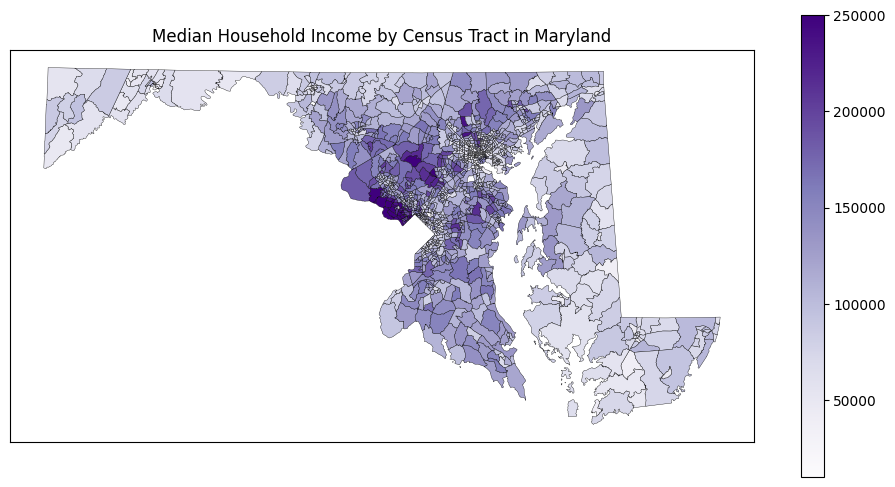

In [37]:
ax = cem.plot_map(
    gdf_md_tracts,
    VARIABLE_MEDIAN_HOUSEHOLD_INCOME,
    legend=True,
    linewidth=0.25, 
    cmap="Purples", 
    edgecolor='black',
    figsize=(12, 6)
)

_ = ax.set_title("Median Household Income by Census Tract in Maryland")

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Census Tracts in Prince George's County, Maryland

In [38]:
import censusdis.counties.maryland as md_counties

gdf_prince_georges_md_tracts = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME', VARIABLE_MEDIAN_HOUSEHOLD_INCOME],

    # All tracts in all counties in Maryland. 
    # We now use three arguments.
    state=states.MD,
    county=md_counties.PRINCE_GEORGES,
    tract='*',
    
    with_geometry=True  
)

In [39]:
gdf_prince_georges_md_tracts.head()

,STATE,COUNTY,TRACT,NAME,B19013_001E,geometry
0,24,033,800102,Census Tract 8001.02; Prince George's County; Maryland,71477,"POLYGON ((-76.86658 39.10759, -76.86454 39.10894, -76.86397 39.11095, -76.86222 39.11035, -76.85672 39.11073, -76.85354 39.10992, -76.85191 39.10923, -76.84908 39.10910, -76.84624 39.10797, -76.84898 39.10419, -76.85305 39.10030, -76.85495 39.10121, -76.85611 39.10137, -76.85764 39.10151, -76.86053 39.10180, -76.86204 39.10160, -76.86184 39.10386, -76.86615 39.10499, -76.86691 39.10665, -76.86658 39.10759))"
1,24,033,800103,Census Tract 8001.03; Prince George's County; Maryland,78536,"POLYGON ((-76.85305 39.10030, -76.84898 39.10419, -76.84624 39.10797, -76.84344 39.10699, -76.84159 39.10586, -76.84089 39.10454, -76.84036 39.10314, -76.83780 39.10095, -76.83756 39.09685, -76.83561 39.09664, -76.83252 39.09532, -76.82852 39.09500, -76.82748 39.09297, -76.82712 39.08983, -76.83237 39.08577, -76.83260 39.08607, -76.83288 39.08636, -76.83943 39.09115, -76.84390 39.09294, -76.84592 39.09404, -76.84743 39.09530, -76.84822 39.09552, -76.85085 39.09722, -76.84980 39.09818, -76.85..."
2,24,033,800105,Census Tract 8001.05; Prince George's County; Maryland,93779,"POLYGON ((-76.88941 39.10159, -76.88935 39.10171, -76.88884 39.10396, -76.88759 39.10520, -76.88036 39.10960, -76.87702 39.11153, -76.87776 39.11192, -76.87356 39.11538, -76.87281 39.11459, -76.87090 39.11412, -76.87037 39.11292, -76.86900 39.11221, -76.86397 39.11095, -76.86454 39.10894, -76.86658 39.10759, -76.86691 39.10665, -76.86615 39.10499, -76.86184 39.10386, -76.86204 39.10160, -76.86240 39.10159, -76.86226 39.10147, -76.86319 39.10150, -76.86576 39.10184, -76.86744 39.10240, -76.87..."
3,24,033,800106,Census Tract 8001.06; Prince George's County; Maryland,112330,"POLYGON ((-76.89385 39.08965, -76.89221 39.09253, -76.88998 39.09987, -76.88439 39.10083, -76.87501 39.10244, -76.87169 39.10290, -76.87111 39.10288, -76.87174 39.10027, -76.87223 39.09955, -76.87464 39.09674, -76.87505 39.09608, -76.87571 39.09430, -76.87036 39.09357, -76.86517 39.09305, -76.86128 39.09221, -76.85860 39.09215, -76.85721 39.09176, -76.85755 39.09147, -76.85792 39.09114, -76.86549 39.08983, -76.86589 39.09008, -76.86824 39.09058, -76.87344 39.09048, -76.87594 39.09125, -76.88..."
4,24,033,800108,Census Tract 8001.08; Prince George's County; Maryland,80550,"POLYGON ((-76.86995 39.09673, -76.86740 39.09658, -76.86231 39.09841, -76.85915 39.09964, -76.85810 39.09988, -76.85539 39.09945, -76.85085 39.09722, -76.85415 39.09435, -76.85700 39.09193, -76.85721 39.09176, -76.85860 39.09215, -76.86128 39.09221, -76.86517 39.09305, -76.87036 39.09357, -76.86995 39.09673))"


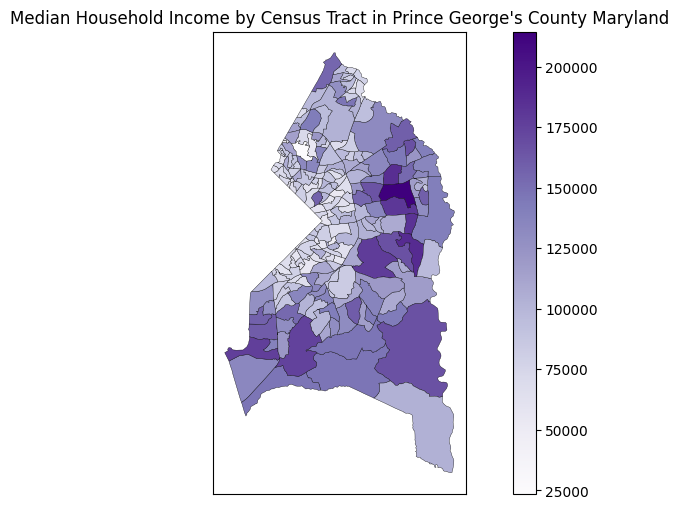

In [40]:
ax = cem.plot_map(
    gdf_prince_georges_md_tracts,
    VARIABLE_MEDIAN_HOUSEHOLD_INCOME,
    legend=True,
    linewidth=0.25, 
    cmap="Purples", 
    edgecolor='black',
    figsize=(12, 6)
)

_ = ax.set_title("Median Household Income by Census Tract in Prince George's County Maryland")

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Counties Nationwide

In [41]:
%%time

gdf_us_counties = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME', VARIABLE_MEDIAN_HOUSEHOLD_INCOME],

    # All counties in all states.
    state=states.ALL_STATES_DC_AND_PR,
    tract='*',
    
    with_geometry=True  
)

len(gdf_us_counties.index)

CPU times: user 1.43 s, sys: 219 ms, total: 1.65 s
Wall time: 18.9 s


85396

CPU times: user 6.83 s, sys: 2.24 s, total: 9.07 s
Wall time: 6.64 s


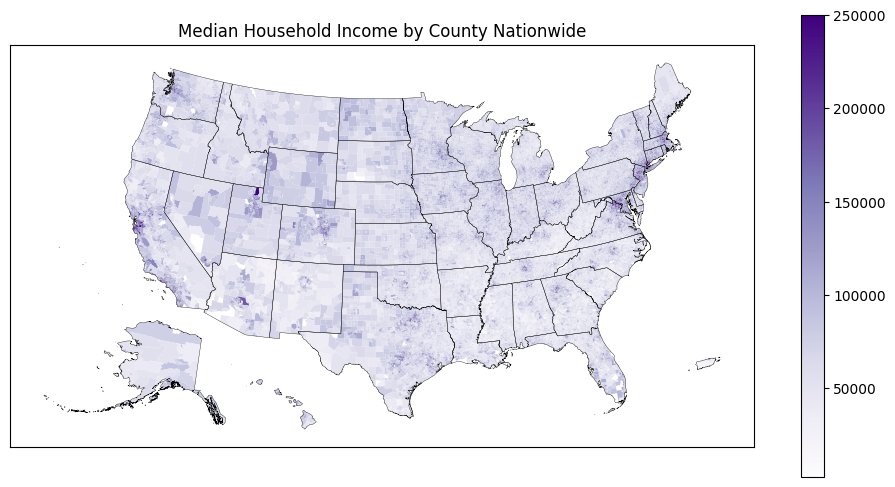

In [42]:
%%time

ax = cem.plot_us(
    gdf_us_counties.dropna(),
    VARIABLE_MEDIAN_HOUSEHOLD_INCOME,
    legend=True,
    cmap="Purples", 
    figsize=(12, 6)
)

ax = cem.plot_us_boundary(
    gdf_states,
    edgecolor='black',
    linewidth=0.25,
    ax=ax
)

_ = ax.set_title("Median Household Income by County Nationwide")

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Off-Spine Geography (And our first foray into metadata)

- *US - Region - Division - State - County - Tract - Block Group*, are referred to as *on-spine* geographies
- Not all geographies nest and cover all areas like on-spine geographies do.
- Those that don't are called *off-spine* geographies.
- We can query all available nested geometries, on and off-spine.
- All are valid combinations of geography kwargs.

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

<img src="./images/census_geos.png" alt="Census Geographies" width="600px">

More details at https://www.census.gov/content/dam/Census/data/developers/geoareaconcepts.pdf.

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Query for geographies available for a dataset

Each element is a list that tells us a valid combination
of geography `kwargs`.

In [43]:
list(ced.geographies(ACS5, 2022))

[['us'],
 ['region'],
 ['division'],
 ['state'],
 ['state', 'county'],
 ['state', 'county', 'county_subdivision'],
 ['state', 'county', 'county_subdivision', 'subminor_civil_division'],
 ['state', 'county', 'county_subdivision', 'place_remainder_or_part'],
 ['state', 'county', 'tract'],
 ['state', 'county', 'tract', 'block_group'],
 ['state', 'place', 'county_or_part'],
 ['state', 'place'],
 ['state', 'consolidated_city'],
 ['state', 'consolidated_city', 'place_or_part'],
 ['state', 'alaska_native_regional_corporation'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land',
  'tribal_subdivision_remainder'],
 ['american_indian_area_alaska_native_area_reservation_or_statistical_entity_only'],
 ['american_indian_area_off_reservation_trust_land_only_hawaiian_home_land'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land',
  'tribal_census_tract'],
 ['american_indian_area_alaska_native_area_hawaiian_home

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Different data sets support different geometries in different years

In [44]:
len(ced.geographies(ACS5, 2022))

87

In [45]:
len(ced.geographies(DECENNIAL_PUBLIC_LAW_94_171, 2020))

96

In [46]:
len(ced.geographies(DECENNIAL_PUBLIC_LAW_94_171, 2010))

83

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Places in Maryland

- `['state', 'place']` was one of the entries in the list above. 
- It tells us that `state=` and `place=` are 
valid keywords to describe a geography.
- We will use them in the query below.
- Places are off-spine, so
  - Places do not cover the entire area of the state the way on-spine geometries do.
  - Every part of the state is in a county, a census tract, and a block group.
  - Not every part of the state is in a place.

In [47]:
gdf_md_places = ced.download(
    ACS5,
    2022,
    ['NAME', VARIABLE_MEDIAN_HOUSEHOLD_INCOME], 
   
    # Query all places in Maryland
    state=states.MD,
    place='*',
    
    with_geometry=True
)

gdf_md_places.head()

,STATE,PLACE,NAME,B19013_001E,geometry
0,24,00125,"Aberdeen city, Maryland",74555.0,"POLYGON ((-76.20372 39.53569, -76.20026 39.53808, -76.19734 39.54078, -76.19648 39.54070, -76.19643 39.54100, -76.19720 39.54108, -76.19532 39.54425, -76.19346 39.54363, -76.19135 39.54442, -76.19144 39.54751, -76.19252 39.54751, -76.19210 39.55040, -76.19100 39.55152, -76.18916 39.55060, -76.19011 39.54931, -76.18750 39.54936, -76.18751 39.55057, -76.18044 39.54988, -76.18044 39.54845, -76.17882 39.54382, -76.18337 39.54451, -76.18396 39.54251, -76.18240 39.54328, -76.17881 39.54278, -76.17..."
1,24,00175,"Aberdeen Proving Ground CDP, Maryland",118750.0,"POLYGON ((-76.17136 39.49442, -76.17098 39.49490, -76.16874 39.49400, -76.16482 39.49824, -76.16249 39.50006, -76.16488 39.50148, -76.16466 39.50165, -76.16453 39.50176, -76.15944 39.49883, -76.15651 39.50456, -76.15287 39.50350, -76.14983 39.50045, -76.14953 39.50060, -76.14597 39.50182, -76.13304 39.49975, -76.13238 39.49938, -76.13098 39.49744, -76.13363 39.49432, -76.13189 39.49321, -76.13383 39.49079, -76.13311 39.48827, -76.12792 39.48677, -76.12812 39.48668, -76.12598 39.48467, -76.12..."
2,24,00200,"Abingdon CDP, Maryland",141384.0,"POLYGON ((-76.29964 39.46149, -76.28673 39.46654, -76.27837 39.47050, -76.27014 39.47679, -76.26689 39.47832, -76.26209 39.48060, -76.26205 39.47887, -76.25991 39.47498, -76.26034 39.47276, -76.25751 39.47116, -76.25562 39.46899, -76.25063 39.46469, -76.25229 39.46326, -76.25267 39.46261, -76.26047 39.45879, -76.26844 39.45696, -76.28549 39.44693, -76.28653 39.44691, -76.28736 39.45158, -76.28862 39.45213, -76.29094 39.45172, -76.29392 39.45291, -76.29572 39.45246, -76.29669 39.45328, -76.29..."
3,24,00225,"Accident town, Maryland",54333.0,"POLYGON ((-79.32468 39.62597, -79.32603 39.62851, -79.32247 39.63155, -79.31650 39.63341, -79.31242 39.62729, -79.31786 39.62162, -79.32174 39.61623, -79.32622 39.61866, -79.32308 39.62289, -79.32624 39.62411, -79.32468 39.62597))"
4,24,00250,"Accokeek CDP, Maryland",150917.0,"POLYGON ((-77.07860 38.69411, -77.05950 38.70191, -77.04340 38.70361, -77.02910 38.69811, -77.00413 38.69635, -77.00136 38.69702, -77.00026 38.69644, -76.99873 38.69718, -76.99658 38.69738, -76.99572 38.69661, -76.99389 38.69764, -76.99266 38.69619, -76.99083 38.69538, -76.98921 38.69604, -76.98656 38.69866, -76.98551 38.69941, -76.98210 38.69810, -76.97992 38.69797, -76.97745 38.69925, -76.97696 38.70173, -76.97523 38.70336, -76.97453 38.70329, -76.97182 38.70374, -76.97094 38.70437, -76.97..."


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Plot places

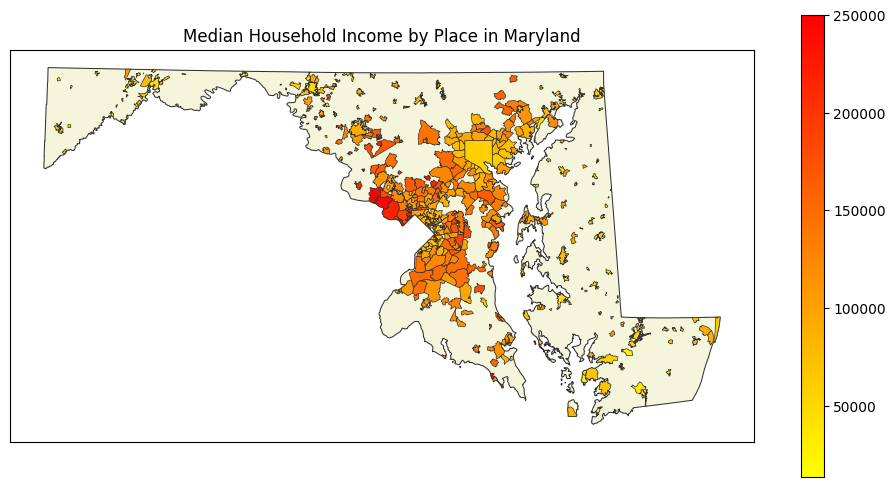

In [48]:
# Plot the whole state in a background color.
gdf_md_state = gdf_states[gdf_states['STATE']==states.MD]

ax = cem.plot_map(
    gdf_md_state, linewidth=0.75, color='beige', edgecolor='#333', figsize=(12, 6)
)

# Plot the places on top.
ax = cem.plot_map(
    gdf_md_places,
    VARIABLE_MEDIAN_HOUSEHOLD_INCOME,

    cmap='autumn_r',
    edgecolor='#333',
    linewidth=0.5,
            
    figsize=(12, 6),
    legend=True,

    # Plot on top of the Maryland map we just plotted.
    ax=ax
)

_ = ax.set_title("Median Household Income by Place in Maryland")

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

#### Or if you prefer a background map

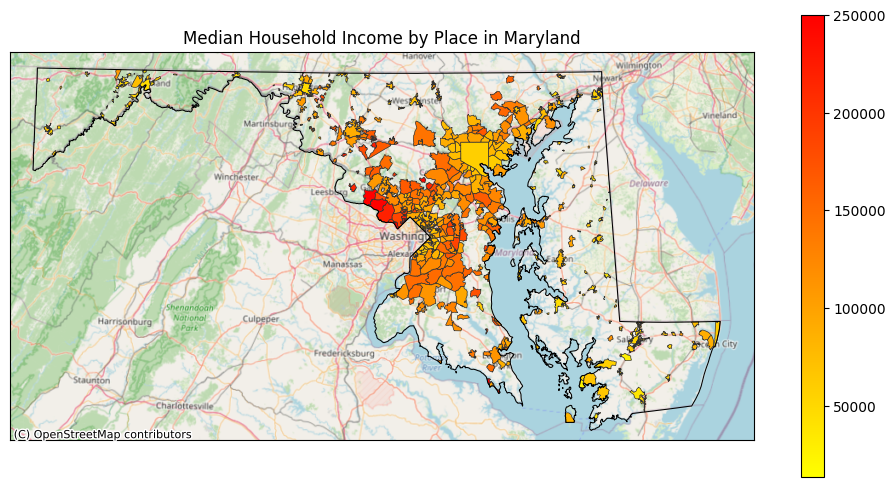

In [49]:
ax = cem.plot_map(
    gdf_md_places,
    VARIABLE_MEDIAN_HOUSEHOLD_INCOME,
    
    cmap='autumn_r',
    edgecolor='#333',
    linewidth=0.5,
    
    figsize=(12, 6),
    legend=True,
    
    # Add a background map from Open Street Maps
    with_background=True
)

ax = cem.plot_map(
    gdf_md.boundary,
    edgecolor='black',
    linewidth=0.75,
    ax=ax
)

_ = ax.set_title("Median Household Income by Place in Maryland")

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Putting On and Off-Spine Geometries Together

- Sometimes we want to mix on and off-spine geometries. 
- This makes some sense to a human, even if the data model does not specifically enable it.
- For example: All census tracts in a place.

<img src="./images/census_geos_place_tract.png" alt="Path to Census Geographies Place and Tract" width="600px">

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### `ced.contained_within` can get it right in most cases.

- We specify geometry in two steps:
  - Outer geoentry (the container; e.g. a place)
  - Inner geometry (what is contained; e.g. tracts)

In [50]:
%%time

from censusdis.places.massachusetts import BOSTON_CITY

gdf_boston_tracts = ced.contained_within(
    # This is the outer geometry that we want all of our results to be within.
    state=states.MA,
    place=BOSTON_CITY
).download(
    # This looks like the arguments to an ordinary `ced.download`
    # but the results will be restricted to those contained within
    # Boston.
    dataset=ACS5,
    vintage=2022,
    download_variables=["NAME", VARIABLE_MEDIAN_RENT],

    # These are the geometries we want data for, but only for the ones contained
    # in the outer geometry.
    state=states.MA,
    county="*",
    tract="*",

    with_geometry=True,

    # This makes the maps a little prettier by clipping 
    # water from the geographies.
    remove_water=True,
)

CPU times: user 18.4 s, sys: 2.36 s, total: 20.8 s
Wall time: 23.2 s


In [51]:
gdf_boston_tracts.head()

,STATE,PLACE,COUNTY,TRACT,NAME,B25064_001E,geometry
0,25,07000,025,000101,Census Tract 1.01; Suffolk County; Massachusetts,2438.0,"POLYGON ((-71.13660 42.36016, -71.13627 42.36090, -71.13533 42.36318, -71.13309 42.36338, -71.13022 42.36269, -71.13042 42.36196, -71.12977 42.36107, -71.12888 42.36037, -71.13083 42.35902, -71.13149 42.35860, -71.13308 42.35856, -71.13330 42.35858, -71.13696 42.35932, -71.13660 42.36016))"
1,25,07000,025,000102,Census Tract 1.02; Suffolk County; Massachusetts,2121.0,"POLYGON ((-71.16090 42.35863, -71.15399 42.35932, -71.14847 42.36053, -71.14451 42.36293, -71.13955 42.36370, -71.13545 42.36485, -71.13533 42.36318, -71.13627 42.36090, -71.13660 42.36016, -71.13696 42.35932, -71.13798 42.35761, -71.13907 42.35379, -71.14068 42.35400, -71.14418 42.35489, -71.14908 42.35615, -71.15319 42.35723, -71.15376 42.35753, -71.15469 42.35814, -71.16090 42.35863))"
2,25,07000,025,000201,Census Tract 2.01; Suffolk County; Massachusetts,2652.0,"POLYGON ((-71.16764 42.35379, -71.16520 42.35332, -71.16430 42.35528, -71.16278 42.35482, -71.16256 42.35553, -71.16177 42.35818, -71.16090 42.35863, -71.15469 42.35814, -71.15376 42.35753, -71.15427 42.35607, -71.15614 42.35535, -71.15671 42.35474, -71.15806 42.35407, -71.15859 42.35381, -71.16056 42.35267, -71.16030 42.35214, -71.16044 42.34892, -71.16214 42.34899, -71.16309 42.34904, -71.16333 42.34912, -71.16539 42.35027, -71.16760 42.35060, -71.16758 42.35121, -71.16781 42.35284, -71.16..."
3,25,07000,025,000202,Census Tract 2.02; Suffolk County; Massachusetts,2144.0,"POLYGON ((-71.16056 42.35267, -71.15859 42.35381, -71.15806 42.35407, -71.15671 42.35474, -71.15614 42.35535, -71.15427 42.35607, -71.15376 42.35753, -71.15319 42.35723, -71.14908 42.35615, -71.15036 42.35419, -71.15088 42.35335, -71.14674 42.35229, -71.14786 42.35034, -71.15192 42.35164, -71.15238 42.35090, -71.15342 42.34946, -71.15345 42.34915, -71.15575 42.34911, -71.15961 42.34889, -71.16044 42.34892, -71.16030 42.35214, -71.16056 42.35267))"
4,25,07000,025,000301,Census Tract 3.01; Suffolk County; Massachusetts,2634.0,"POLYGON ((-71.17394 42.35340, -71.17139 42.35609, -71.16947 42.35805, -71.16289 42.35795, -71.16177 42.35818, -71.16256 42.35553, -71.16278 42.35482, -71.16430 42.35528, -71.16520 42.35332, -71.16764 42.35379, -71.16781 42.35284, -71.16758 42.35121, -71.16760 42.35060, -71.16811 42.35066, -71.16993 42.34938, -71.17480 42.35027, -71.17394 42.35340))"


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Plot the tracts in Boston

In [52]:
# Let's get the outline of Boston just so we can illustrate
# it when we plot the map.
gdf_boston = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME'],

    state=states.MA,
    place=BOSTON_CITY,
    
    with_geometry=True,
)

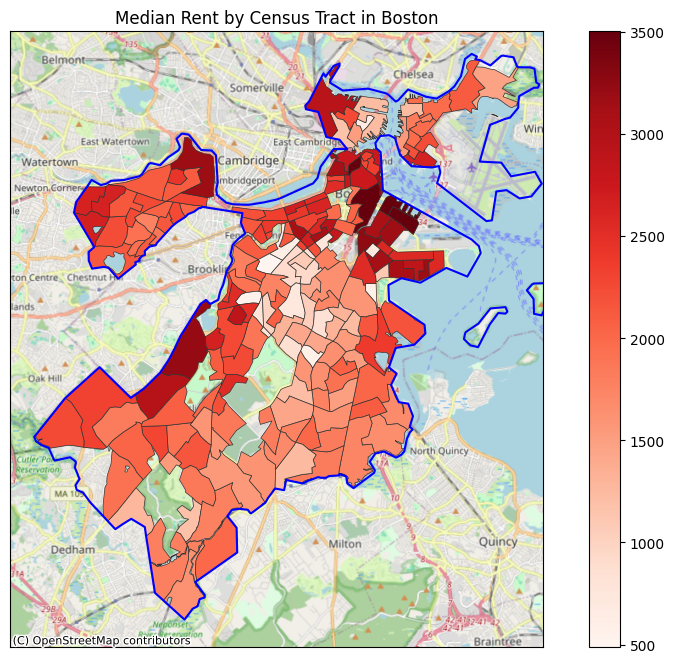

In [53]:
# Plot the median household income for all tracts for which
# we have data.
ax = cem.plot_map(
    gdf_boston_tracts,

    VARIABLE_MEDIAN_RENT,

    cmap='Reds',
    edgecolor='#333',
    linewidth=0.5,
    
    legend=True,

    with_background=True,
    
    figsize=(12, 8),
)

# Plot the boundary of Boston over the top.
ax = cem.plot_map(
    gdf_boston.boundary,
    color='blue',
    linewidth=1.5,
    ax=ax,
    zorder=20,
)

_ = ax.set_title("Median Rent by Census Tract in Boston")

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Navigating Metadata

- ### How did we know about ACS5 and DECENNIAL_PUBLIC_LAW_94_171 and their variables?
- ### What other data sets and variables exist?

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## A sample case study

### Research questions: 

- #### What fraction of employment is in restaurants?
- #### Can we break down employment by into smaller geographies like counties?

#### We are interested specifically in Maryland.


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Step 0: Discovering all the Datasets

This is the question we have conveniently ignored from the beginning.

In [54]:
df_datasets = ced.variables.all_data_sets()
df_datasets.head()

,YEAR,SYMBOL,DATASET,TITLE,DESCRIPTION,API BASE URL
0,1986,CBP,cbp,1986 County Business Patterns: Business Patterns,"County Business Patterns (CBP) is an annual series that provides economic data by industry at the U.S., State, County and Metropolitan Area levels. This series includes the number of establishments, employment during the week of March 12, first quarter payroll, and annual payroll. CBP provides statistics for businesses with paid employees for the U.S., Puerto Rico, and the Island Areas. Census Bureau staff identified a processing error that affects selected data from the 2014 County Business...",http://api.census.gov/data/1986/cbp
1,1987,CBP,cbp,1987 County Business Patterns: Business Patterns,"County Business Patterns (CBP) is an annual series that provides economic data by industry at the U.S., State, County and Metropolitan Area levels. This series includes the number of establishments, employment during the week of March 12, first quarter payroll, and annual payroll. CBP provides statistics for businesses with paid employees for the U.S., Puerto Rico, and the Island Areas. Census Bureau staff identified a processing error that affects selected data from the 2014 County Business...",http://api.census.gov/data/1987/cbp
2,1988,CBP,cbp,1988 County Business Patterns: Business Patterns,"County Business Patterns (CBP) is an annual series that provides economic data by industry at the U.S., State, County and Metropolitan Area levels. This series includes the number of establishments, employment during the week of March 12, first quarter payroll, and annual payroll. CBP provides statistics for businesses with paid employees for the U.S., Puerto Rico, and the Island Areas. Census Bureau staff identified a processing error that affects selected data from the 2014 County Business...",http://api.census.gov/data/1988/cbp
3,1989,CBP,cbp,1989 County Business Patterns: Business Patterns,"County Business Patterns (CBP) is an annual series that provides economic data by industry at the U.S., State, County and Metropolitan Area levels. This series includes the number of establishments, employment during the week of March 12, first quarter payroll, and annual payroll. CBP provides statistics for businesses with paid employees for the U.S., Puerto Rico, and the Island Areas. Census Bureau staff identified a processing error that affects selected data from the 2014 County Business...",http://api.census.gov/data/1989/cbp
4,1989,CPS_BASIC_APR,cps/basic/apr,Apr 1989 Current Population Survey: Basic Monthly,"To provide estimates of employment, unemployment, and other characteristics of the general labor force, of the population as a whole, and of various subgroups of the population. Monthly labor force data for the country are used by the Bureau of Labor Statistics (BLS) to determine the distribution of funds under the Job Training Partnership Act. These data are collected through combined computer-assisted personal interviewing (CAPI) and computer-assisted telephone interviewing (CATI). In addi...",http://api.census.gov/data/1989/cps/basic/apr


In [55]:
len(df_datasets.index)

1602

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Step 1: what recent data sets talk about businesses?

In [56]:
df_datasets[
    df_datasets['TITLE'].str.contains('Business') & (df_datasets['YEAR'] == 2021)
]

,YEAR,SYMBOL,DATASET,TITLE,DESCRIPTION,API BASE URL
1409,2021,ABS_CB,abscb,Economic Surveys: Annual Business Survey: Characteristics of Businesses,"The Annual Business Survey (ABS) provides information on selected economic and demographic characteristics for businesses and business owners by sex, ethnicity, race, and veteran status. Further, the survey measures research and development (for microbusinesses), new business topics such as innovation and technology, as well as other business characteristics. The U.S. Census Bureau and the National Center conduct the ABS jointly for Science and Engineering Statistics within the National Scie...",http://api.census.gov/data/2021/abscb
1410,2021,ABS_CBO,abscbo,Economic Surveys: Annual Business Survey: Characteristics of Business Owners,"The Annual Business Survey (ABS) provides information on selected economic and demographic characteristics for businesses and business owners by sex, ethnicity, race, and veteran status. Further, the survey measures research and development (for microbusinesses), new business topics such as innovation and technology, as well as other business characteristics. The U.S. Census Bureau and the National Center conduct the ABS jointly for Science and Engineering Statistics within the National Scie...",http://api.census.gov/data/2021/abscbo
1411,2021,ABS_CS,abscs,Economic Surveys: Annual Business Survey: Company Summary,"The Annual Business Survey (ABS) provides information on selected economic and demographic characteristics for businesses and business owners by sex, ethnicity, race, and veteran status. Further, the survey measures research and development (for microbusinesses), new business topics such as innovation and technology, as well as other business characteristics. The U.S. Census Bureau and the National Center conduct the ABS jointly for Science and Engineering Statistics within the National Scie...",http://api.census.gov/data/2021/abscs
1412,2021,ABS_MCB,absmcb,Economic Surveys: Annual Business Survey: Module Characteristics of Businesses,"The Annual Business Survey (ABS) provides information on selected economic and demographic characteristics for businesses and business owners by sex, ethnicity, race, and veteran status. Further, the survey measures research and development (for microbusinesses), new business topics such as innovation and technology, as well as other business characteristics. The U.S. Census Bureau and the National Center conduct the ABS jointly for Science and Engineering Statistics within the National Scie...",http://api.census.gov/data/2021/absmcb
1432,2021,CBP,cbp,Economic Surveys: Business Patterns: County Business Patterns,"County Business Patterns (CBP) is an annual series that provides sub-national economic data by industry for establishments with paid employees. This series includes the number of establishments, employment during the week of March 12, first quarter payroll, and annual payroll. Data for establishments are presented by geographic area, 2- thru 6-digit NAICS industry, Legal Form of Organization (U.S. and state only), and employment size of the establishment.",http://api.census.gov/data/2021/cbp
1463,2021,VIUSE,viuse,Economic Surveys: Vehicle Inventory and Use Survey: Business Use Vehicles,"The Vehicle Inventory and Use Survey (VIUS) is conducted in partnership with the Bureau of Transportation Statistics, Federal Highway Administration, and the U.S. Department of Energy to better understand the characteristics and use of trucks on our nation's roads. The survey universe for the VIUS includes all private and commercial trucks registered (or licensed) in the United States. This includes: pickups; minivans, other light vans, and sport utility vehicles; other light single-unit tru...",http://api.census.gov/data/2021/viuse
1464,2021,VIUSF,viusf,"Economic Surveys: Vehicle Inventory and Use Survey: Business Use Vehicles, excluding pickups, SUVs, light vans","The Vehicle Inventory and Use Survey (VIUS) is conduct

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Step 2: CBP looks interesting, let's learn more


- #### It is still up to you to make sure you understand the data set and it fits your needs.
- #### Google "US Census CBP" leads me to https://www.census.gov/programs-surveys/cbp.html

"County Business Patterns (CBP) is an annual series that provides subnational economic data for establishments with paid employees by industry and employment size. This series includes the number of establishments, employment during the week of March 12, first quarter payroll, and annual payroll."

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

#### Step 2a: What groups of variables does CBP have? 

In [57]:
# I can import any value found in the 'SYMBOL' column of `all_datasets`
from censusdis.datasets import CBP

df_groups_cbp = ced.variables.all_groups(CBP, 2021)

df_groups_cbp

,DATASET,YEAR,GROUP,DESCRIPTION
0,cbp,2021,CB2100CBP,"All Sectors: County Business Patterns, including ZIP Code Business Patterns, by Legal Form of Organization and Employment Size Class for the U.S., States, and Selected Geographies: 2021"


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

#### Step 2b: What variables are in the group?

In [58]:
ced.variables.all_variables(CBP, 2021, 'CB2100CBP')

,YEAR,DATASET,GROUP,VARIABLE,LABEL,SUGGESTED_WEIGHT,VALUES
0,2021,cbp,CB2100CBP,EMP,Number of employees,NaN,None
1,2021,cbp,CB2100CBP,EMPSZES,Employment size of establishments code,NaN,None
2,2021,cbp,CB2100CBP,EMPSZES_LABEL,Meaning of Employment size of establishments code,NaN,None
3,2021,cbp,CB2100CBP,EMP_F,Flag for number of employees,NaN,None
4,2021,cbp,CB2100CBP,EMP_N,Noise range for number of employees,NaN,None
5,2021,cbp,CB2100CBP,EMP_N_F,Flag for Noise range for number of employees,NaN,None
6,2021,cbp,CB2100CBP,ESTAB,Number of establishments,NaN,None
7,2021,cbp,CB2100CBP,ESTAB_F,Flag for number of establishments,NaN,None
8,2021,cbp,CB2100CBP,GEO_ID,Geographic identifier code,NaN,None
9,2021,cbp,CB2100CBP,GEO_ID_F,Geo Footnote,NaN,None


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

#### Step 2c: What geographies are supported?

In [59]:
list(ced.geographies(CBP, 2021))

[['us'],
 ['state'],
 ['state', 'county'],
 ['metropolitan_statistical_area_micropolitan_statistical_area'],
 ['combined_statistical_area'],
 ['state', 'congressional_district'],
 ['zip_code']]

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Step 3: Download some data

In [60]:
gdf_cbp = ced.download(
    dataset=CBP,
    vintage=2021,

    # Here are the variables that look like they are of interest:
    download_variables=['NAME', 'EMP', 'EMPSZES', 'EMPSZES_LABEL', 'NAICS2017', 'NAICS2017_LABEL'],

    # All counties in Maryland, using one of the supported geographies.
    state=states.MD,
    county='*',

    with_geometry=True,
)

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Note: At this point, we have downloaded all the metadata and data we need.

Everything from here on out is local analysis.

In [61]:
def no_geo(gdf: gpd.GeoDataFrame) -> pd.DataFrame:
    """A utility to strip geometry so display is more compact."""
    return gdf[[col for col in gdf.columns if col != 'geometry']]

In [62]:
no_geo(gdf_cbp)

,STATE,COUNTY,NAME,EMP,EMPSZES,EMPSZES_LABEL,NAICS2017,NAICS2017_LABEL
0,24,001,"Allegany County, Maryland",0,210,Establishments with less than 5 employees,236118,Residential remodelers
1,24,001,"Allegany County, Maryland",0,230,Establishments with 10 to 19 employees,236118,Residential remodelers
2,24,001,"Allegany County, Maryland",167,001,All establishments,2362,Nonresidential building construction
3,24,001,"Allegany County, Maryland",0,210,Establishments with less than 5 employees,2362,Nonresidential building construction
4,24,001,"Allegany County, Maryland",167,001,All establishments,23622,Commercial and institutional building construction
...,...,...,...,...,...,...,...,...
45959,24,510,"Baltimore city, Maryland",3027,001,All establishments,812,Personal and laundry services
45960,24,510,"Baltimore city, Maryland",0,210,Establishments with less than 5 employees,812,Personal and laundry services
45961,24,510,"Baltimore city, Maryland",0,220,Establishments with 5 to 9 employees,812,Personal and laundry services
45962,24,510,"Baltimore city, Maryland",0,230,Establishments with 10 to 19 employees,812,Personal and laundry services


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Step 4: Filter down to the data we want

- https://www.census.gov/naics/?input=7225&year=2017 tells me the code for restaurants is 7225
- '001' is the code for all establishements (any size)


In [63]:
# Filters to get the data we want:
NAICS2017_ALL = "00"
NAICS2017_RESTAURANTS = "7225"
EMPSZES_ALL_SIZES = "001"

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

In [64]:
# Total restaurant employment by county:
gdf_restaurant_cbp = gdf_cbp[
    (gdf_cbp['NAICS2017'] == NAICS2017_RESTAURANTS) 
    & (gdf_cbp['EMPSZES'] == EMPSZES_ALL_SIZES)
]

no_geo(gdf_restaurant_cbp)

,STATE,COUNTY,NAME,EMP,EMPSZES,EMPSZES_LABEL,NAICS2017,NAICS2017_LABEL
900,24,001,"Allegany County, Maryland",2143,001,All establishments,7225,Restaurants and other eating places
2352,24,003,"Anne Arundel County, Maryland",20843,001,All establishments,7225,Restaurants and other eating places
5174,24,005,"Baltimore County, Maryland",22447,001,All establishments,7225,Restaurants and other eating places
9487,24,009,"Calvert County, Maryland",2666,001,All establishments,7225,Restaurants and other eating places
10689,24,011,"Caroline County, Maryland",343,001,All establishments,7225,Restaurants and other eating places
11343,24,013,"Carroll County, Maryland",5262,001,All establishments,7225,Restaurants and other eating places
13636,24,015,"Cecil County, Maryland",2674,001,All establishments,7225,Restaurants and other eating places
15109,24,017,"Charles County, Maryland",5135,001,All establishments,7225,Restaurants and other eating places
16233,24,019,"Dorchester County, Maryland",667,001,All establishments,7225,Restaurants and other eating places
18328,24,021,"Frederick County, Maryland",7830,001,All establishments,7225,Restaurants and other eating places


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

In [65]:
# Total business employment:
gdf_all_biz_cbp = gdf_cbp[
    (gdf_cbp['NAICS2017'] == NAICS2017_ALL) 
    & (gdf_cbp['EMPSZES'] == EMPSZES_ALL_SIZES)
]

no_geo(gdf_all_biz_cbp)

,STATE,COUNTY,NAME,EMP,EMPSZES,EMPSZES_LABEL,NAICS2017,NAICS2017_LABEL
603,24,001,"Allegany County, Maryland",20908,001,All establishments,00,Total for all sectors
4759,24,003,"Anne Arundel County, Maryland",234074,001,All establishments,00,Total for all sectors
6060,24,005,"Baltimore County, Maryland",317997,001,All establishments,00,Total for all sectors
9399,24,009,"Calvert County, Maryland",18145,001,All establishments,00,Total for all sectors
10683,24,011,"Caroline County, Maryland",7114,001,All establishments,00,Total for all sectors
12110,24,013,"Carroll County, Maryland",50736,001,All establishments,00,Total for all sectors
13574,24,015,"Cecil County, Maryland",28190,001,All establishments,00,Total for all sectors
15483,24,017,"Charles County, Maryland",32353,001,All establishments,00,Total for all sectors
15728,24,019,"Dorchester County, Maryland",9452,001,All establishments,00,Total for all sectors
16271,24,021,"Frederick County, Maryland",88798,001,All establishments,00,Total for all sectors


<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Step 5: Analysis and Results

In [66]:
gdf_analysis = gpd.GeoDataFrame(
    gdf_restaurant_cbp[['STATE', 'COUNTY', 'NAME', 'EMP', 'geometry']].merge(
        gdf_all_biz_cbp[['STATE', 'COUNTY', 'EMP']],
        on=['STATE', 'COUNTY'],
        suffixes=('_RESTAURANT', '_ALL_BIZ')
    )
)

gdf_analysis['FRAC_RESTAURANT'] = gdf_analysis['EMP_RESTAURANT'] / gdf_analysis['EMP_ALL_BIZ']

In [67]:
no_geo(gdf_analysis.nlargest(10, 'FRAC_RESTAURANT'))

,STATE,COUNTY,NAME,EMP_RESTAURANT,EMP_ALL_BIZ,FRAC_RESTAURANT
22,24,047,"Worcester County, Maryland",4637,19119,0.242534
7,24,017,"Charles County, Maryland",5135,32353,0.158718
3,24,009,"Calvert County, Maryland",2666,18145,0.146928
16,24,035,"Queen Anne's County, Maryland",1729,11976,0.144372
10,24,023,"Garrett County, Maryland",1077,10091,0.106729
17,24,037,"St. Mary's County, Maryland",3398,32727,0.103829
5,24,013,"Carroll County, Maryland",5262,50736,0.103713
0,24,001,"Allegany County, Maryland",2143,20908,0.102497
21,24,045,"Wicomico County, Maryland",3300,34316,0.096165
6,24,015,"Cecil County, Maryland",2674,28190,0.094856


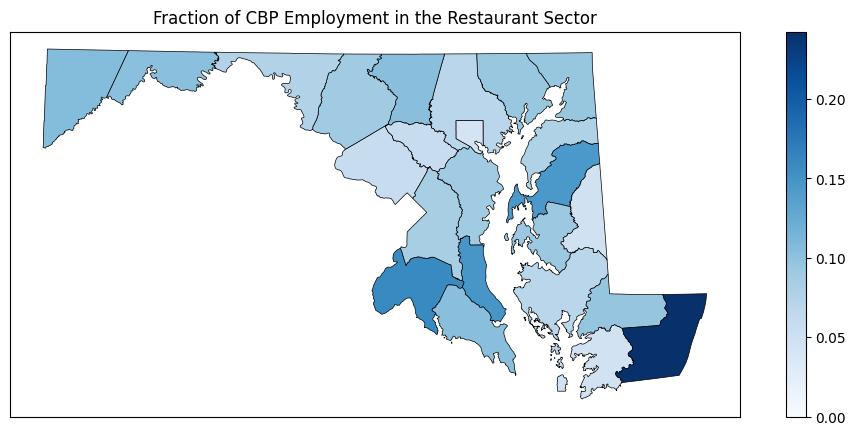

In [68]:
ax = cem.plot_map(
    gdf_analysis,
    'FRAC_RESTAURANT',

    legend=True,

    cmap='Blues',
    vmin=0,
    edgecolor='black',
    linewidth=0.5,
    figsize=(12,5)
)

_ = ax.set_title('Fraction of CBP Employment in the Restaurant Sector')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Summary

- ## How to query data
- ## How to query geometry with data
- ## How to plot maps
- ## How on and off-spine geographies differ
- ## How to discover data sets
- ## How to discover groups and variables

# An upcoming deeper dive:

<table>
    <tr>
        <td>
            <a href="https://www.scipy2024.scipy.org/" target="_blank">
                <img src="./images/SCIPY-2024.png" alt="SciPy 2024 Logo" width="140"/>
            </a>
        </td>
        <td style="font-size:18pt">July 8-14, 2024</td>
        <td style="font-size:18pt">
            Hands on half-day tutorial at SciPy 2024. Tacoma, WA
        </td>
    </tr>
</table>

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Q & A

<br>

<span style="font-size:18pt">Note: Many more resources and sample code at https://github.com/censusdis/censusdis</span>

<a href="https://github.com/censusdis/censusdis" target="_blank">
  <img src="./images/censusdis-preview.png" alt="Censusdis README Preview"/ width="600">
</a>

<br/><br/><br/><br/><br/><br/><br/><br/><br/>